In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re

import warnings
warnings.filterwarnings('ignore')

print(os.listdir('../data/value_car'))

['.DS_Store', 'train.tsv', 'output', 'test.tsv', 'sample_submit.csv', '.ipynb_checkpoints']


In [424]:
def display():
    """This function display history of acc and loss.
    returns: two figures.
    """
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.show()

In [425]:
df_train = pd.read_csv('../data/value_car/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/value_car/test.tsv', delimiter='\t')

In [426]:
df_train.head()

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,unacc,low,med,3,2,small,low
1,3,acc,low,high,3,more,small,med
2,7,unacc,vhigh,high,5more,2,small,med
3,11,acc,high,high,3,more,big,med
4,12,unacc,high,high,3,2,med,high


In [427]:
df_train['class'].value_counts()

unacc    591
acc      206
good      34
vgood     33
Name: class, dtype: int64

In [428]:
def kesson_table(df):
    total = df.isnull().sum()
    percent = total / len(df) * 100
    kesson_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    kesson_table = kesson_table.drop(kesson_table[kesson_table['Total'] == 0].index)
    return kesson_table

In [429]:
df_train['buying'].value_counts()

low      226
med      219
high     218
vhigh    201
Name: buying, dtype: int64

class   acc  good  unacc  vgood
buying                         
high     55     0    163      0
low      53    24    128     21
med      63    10    134     12
vhigh    35     0    166      0


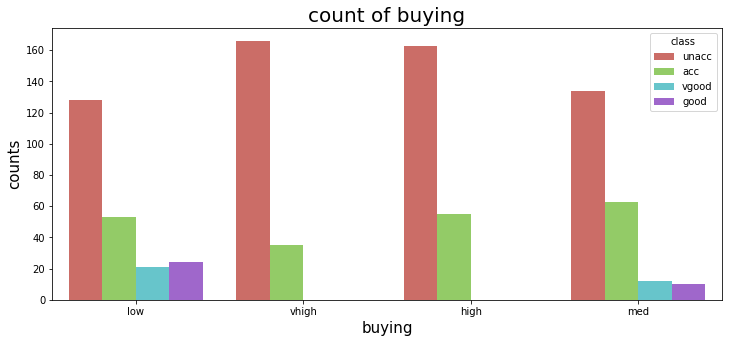

In [430]:
print(pd.crosstab(df_train['buying'], df_train['class']))

plt.figure(figsize=(12, 5))
sns.countplot(x='buying', hue='class', data=df_train, palette='hls')
plt.title('count of buying', fontsize=20)
plt.xlabel('buying', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

In [431]:
df_train['maint'].value_counts()

high     227
vhigh    225
low      219
med      193
Name: maint, dtype: int64

class  acc  good  unacc  vgood
maint                         
high    56     0    165      6
low     52    23    131     13
med     53    11    115     14
vhigh   45     0    180      0


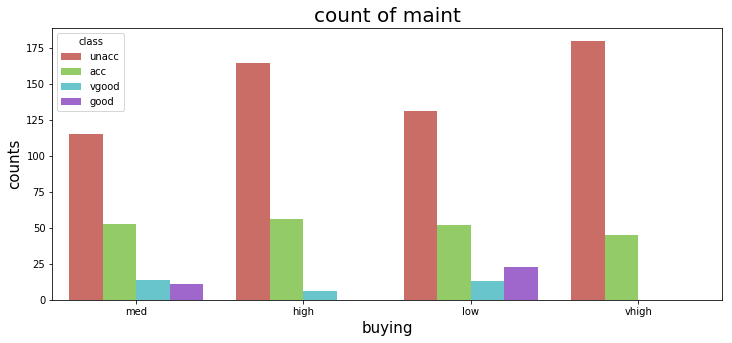

In [432]:
print(pd.crosstab(df_train['maint'], df_train['class']))

plt.figure(figsize=(12, 5))
sns.countplot(x='maint', hue='class', data=df_train, palette='hls')
plt.title('count of maint', fontsize=20)
plt.xlabel('buying', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

In [433]:
df_train['doors'].value_counts()

3        238
4        220
5more    208
2        198
Name: doors, dtype: int64

class  acc  good  unacc  vgood
maint                         
high    56     0    165      6
low     52    23    131     13
med     53    11    115     14
vhigh   45     0    180      0


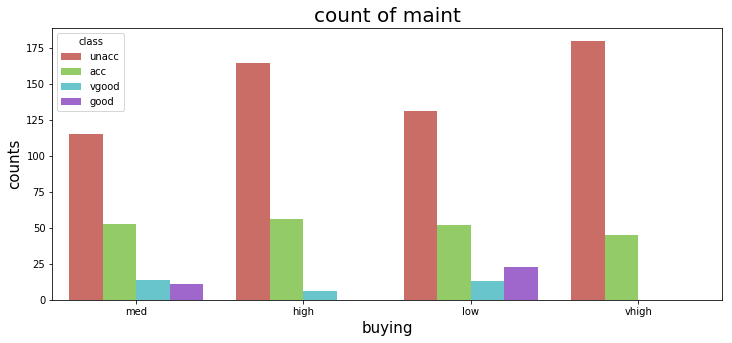

In [434]:
print(pd.crosstab(df_train['maint'], df_train['class']))

plt.figure(figsize=(12, 5))
sns.countplot(x='maint', hue='class', data=df_train, palette='hls')
plt.title('count of maint', fontsize=20)
plt.xlabel('buying', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

In [435]:
df_train['persons'].value_counts()

more    299
2       284
4       281
Name: persons, dtype: int64

class    acc  good  unacc  vgood
persons                         
2          0     0    284      0
4        104    19    145     13
more     102    15    162     20


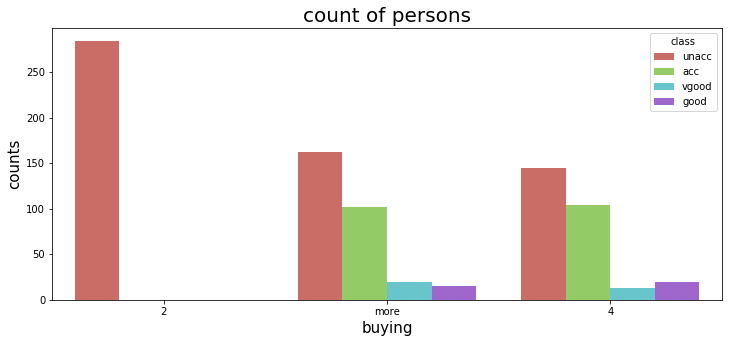

In [436]:
print(pd.crosstab(df_train['persons'], df_train['class']))

plt.figure(figsize=(12, 5))
sns.countplot(x='persons', hue='class', data=df_train, palette='hls')
plt.title('count of persons', fontsize=20)
plt.xlabel('buying', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

In [437]:
df_train['lug_boot'].value_counts()

med      299
big      285
small    280
Name: lug_boot, dtype: int64

class     acc  good  unacc  vgood
lug_boot                         
big        83     9    173     20
med        71    14    201     13
small      52    11    217      0


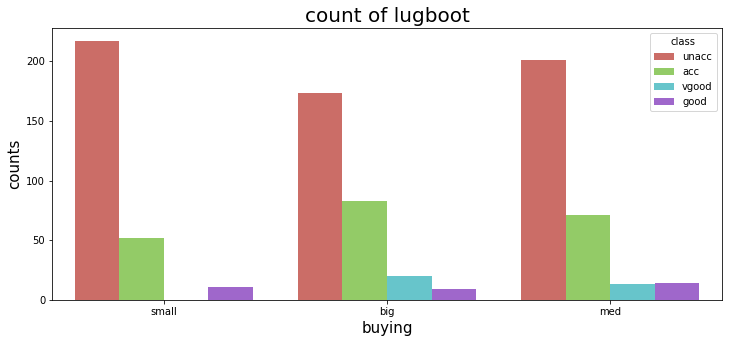

In [438]:
print(pd.crosstab(df_train['lug_boot'], df_train['class']))

plt.figure(figsize=(12, 5))
sns.countplot(x='lug_boot', hue='class', data=df_train, palette='hls')
plt.title('count of lugboot', fontsize=20)
plt.xlabel('buying', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

In [439]:
df_train['safety'].value_counts()

high    291
med     289
low     284
Name: safety, dtype: int64

class   acc  good  unacc  vgood
safety                         
high    105    16    137     33
low       0     0    284      0
med     101    18    170      0


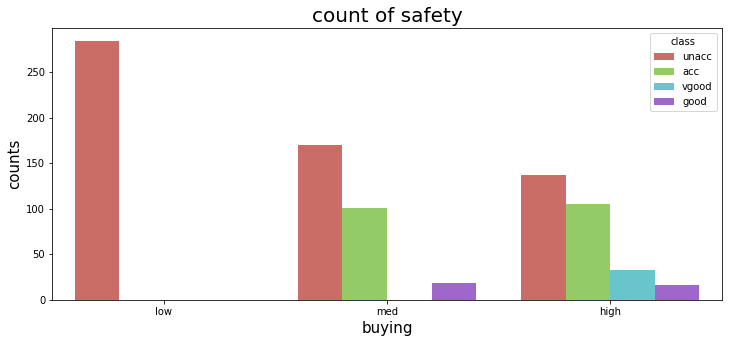

In [440]:
print(pd.crosstab(df_train['safety'], df_train['class']))

plt.figure(figsize=(12, 5))
sns.countplot(x='safety', hue='class', data=df_train, palette='hls')
plt.title('count of safety', fontsize=20)
plt.xlabel('buying', fontsize=15)
plt.ylabel('counts', fontsize=15)
plt.show()

In [441]:
df_train.head()

,id,class,buying,maint,doors,persons,lug_boot,safety
0,0,unacc,low,med,3,2,small,low
1,3,acc,low,high,3,more,small,med
2,7,unacc,vhigh,high,5more,2,small,med
3,11,acc,high,high,3,more,big,med
4,12,unacc,high,high,3,2,med,high


These var are all categorial var

In [442]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

df_train = pd.get_dummies(df_train, columns=columns, prefix=columns)
df_test = pd.get_dummies(df_test, columns=columns, prefix=columns)

In [443]:
from keras.utils import np_utils

train = df_train.drop(['id', 'class'], axis=1)
X_train = train.values

map_list = { 'unacc':0, 'acc':1, 'good':2, 'vgood':3 }
df_train['class'] = df_train['class'].map(map_list)
y_train = df_train['class'].values
y_train = np_utils.to_categorical(y_train, 4)

test = df_test.drop(['id'], axis=1)
X_test = test.values

print(X_train.shape, y_train.shape, X_test.shape)

(864, 21) (864, 4) (864, 21)


In [444]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [445]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [448]:
model = Sequential()

model.add(Dense(21*5, activation='relu', input_dim=21, kernel_initializer='uniform'))
model.add(Dropout(0.3))
#model.add(Dense(15*10, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 105)               2310      
_________________________________________________________________
dropout_38 (Dropout)         (None, 105)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 424       
Total params: 2,734
Trainable params: 2,734
Non-trainable params: 0
_________________________________________________________________


In [449]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=80, epochs=300, validation_split=0.2, verbose=1)

scores = model.evaluate(X_train, y_train, batch_size=30)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Train on 691 samples, validate on 173 samples
Epoch 1/300
691/691 [==============================] - 2s 3ms/step - loss: 1.3723 - acc: 0.5137 - val_loss: 1.3507 - val_acc: 0.7225
Epoch 2/300
691/691 [==============================] - 0s 60us/step - loss: 1.3310 - acc: 0.7410 - val_loss: 1.3085 - val_acc: 0.6936
Epoch 3/300
691/691 [==============================] - 0s 62us/step - loss: 1.2829 - acc: 0.7077 - val_loss: 1.2548 - val_acc: 0.6821
Epoch 4/300
691/691 [==============================] - 0s 56us/step - loss: 1.2210 - acc: 0.6990 - val_loss: 1.1860 - val_acc: 0.6763
Epoch 5/300
691/691 [==============================] - 0s 61us/step - loss: 1.1420 - acc: 0.6946 - val_loss: 1.1031 - val_acc: 0.6821
Epoch 6/300
691/691 [==============================] - 0s 57us/step - loss: 1.0510 - acc: 0.6932 - val_loss: 1.0091 - val_acc: 0.6821
Epoch 7/300
691/691 [==============================] - 0s 60us/step - loss: 0.9471 - acc: 0.7004 - val_loss: 0.9116 - val_acc: 0.6821
Epoch 8/300
691/6

691/691 [==============================] - 0s 64us/step - loss: 0.1250 - acc: 0.9436 - val_loss: 0.1664 - val_acc: 0.9133
Epoch 62/300
691/691 [==============================] - 0s 64us/step - loss: 0.1290 - acc: 0.9436 - val_loss: 0.1612 - val_acc: 0.9191
Epoch 63/300
691/691 [==============================] - 0s 53us/step - loss: 0.1303 - acc: 0.9378 - val_loss: 0.1623 - val_acc: 0.9191
Epoch 64/300
691/691 [==============================] - 0s 53us/step - loss: 0.1178 - acc: 0.9551 - val_loss: 0.1578 - val_acc: 0.9249
Epoch 65/300
691/691 [==============================] - 0s 60us/step - loss: 0.1217 - acc: 0.9537 - val_loss: 0.1535 - val_acc: 0.9249
Epoch 66/300
691/691 [==============================] - 0s 54us/step - loss: 0.1237 - acc: 0.9537 - val_loss: 0.1499 - val_acc: 0.9306
Epoch 67/300
691/691 [==============================] - 0s 53us/step - loss: 0.1148 - acc: 0.9609 - val_loss: 0.1457 - val_acc: 0.9364
Epoch 68/300
691/691 [==============================] - 0s 52us/step

691/691 [==============================] - 0s 80us/step - loss: 0.0452 - acc: 0.9913 - val_loss: 0.0982 - val_acc: 0.9480
Epoch 122/300
691/691 [==============================] - 0s 80us/step - loss: 0.0492 - acc: 0.9884 - val_loss: 0.1005 - val_acc: 0.9422
Epoch 123/300
691/691 [==============================] - 0s 63us/step - loss: 0.0437 - acc: 0.9928 - val_loss: 0.0979 - val_acc: 0.9422
Epoch 124/300
691/691 [==============================] - 0s 50us/step - loss: 0.0399 - acc: 0.9913 - val_loss: 0.0970 - val_acc: 0.9422
Epoch 125/300
691/691 [==============================] - 0s 44us/step - loss: 0.0515 - acc: 0.9884 - val_loss: 0.0975 - val_acc: 0.9480
Epoch 126/300
691/691 [==============================] - 0s 54us/step - loss: 0.0420 - acc: 0.9928 - val_loss: 0.0964 - val_acc: 0.9480
Epoch 127/300
691/691 [==============================] - 0s 83us/step - loss: 0.0419 - acc: 0.9899 - val_loss: 0.0956 - val_acc: 0.9480
Epoch 128/300
691/691 [==============================] - 0s 70

691/691 [==============================] - 0s 82us/step - loss: 0.0221 - acc: 0.9986 - val_loss: 0.0859 - val_acc: 0.9538
Epoch 182/300
691/691 [==============================] - 0s 87us/step - loss: 0.0229 - acc: 0.9986 - val_loss: 0.0870 - val_acc: 0.9538
Epoch 183/300
691/691 [==============================] - 0s 45us/step - loss: 0.0213 - acc: 0.9957 - val_loss: 0.0883 - val_acc: 0.9538
Epoch 184/300
691/691 [==============================] - 0s 69us/step - loss: 0.0274 - acc: 0.9928 - val_loss: 0.0866 - val_acc: 0.9538
Epoch 185/300
691/691 [==============================] - 0s 77us/step - loss: 0.0249 - acc: 0.9957 - val_loss: 0.0819 - val_acc: 0.9653
Epoch 186/300
691/691 [==============================] - 0s 59us/step - loss: 0.0259 - acc: 0.9971 - val_loss: 0.0808 - val_acc: 0.9653
Epoch 187/300
691/691 [==============================] - 0s 65us/step - loss: 0.0198 - acc: 0.9971 - val_loss: 0.0828 - val_acc: 0.9653
Epoch 188/300
691/691 [==============================] - 0s 72

691/691 [==============================] - 0s 75us/step - loss: 0.0229 - acc: 0.9928 - val_loss: 0.0863 - val_acc: 0.9538
Epoch 242/300
691/691 [==============================] - 0s 75us/step - loss: 0.0164 - acc: 0.9971 - val_loss: 0.0859 - val_acc: 0.9538
Epoch 243/300
691/691 [==============================] - 0s 67us/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.0848 - val_acc: 0.9595
Epoch 244/300
691/691 [==============================] - 0s 72us/step - loss: 0.0216 - acc: 0.9942 - val_loss: 0.0818 - val_acc: 0.9595
Epoch 245/300
691/691 [==============================] - 0s 56us/step - loss: 0.0127 - acc: 1.0000 - val_loss: 0.0820 - val_acc: 0.9595
Epoch 246/300
691/691 [==============================] - 0s 58us/step - loss: 0.0217 - acc: 0.9971 - val_loss: 0.0796 - val_acc: 0.9653
Epoch 247/300
691/691 [==============================] - 0s 98us/step - loss: 0.0145 - acc: 0.9986 - val_loss: 0.0808 - val_acc: 0.9595
Epoch 248/300
691/691 [==============================] - 0s 73

864/864 [==============================] - 0s 47us/step
acc: 99.42%


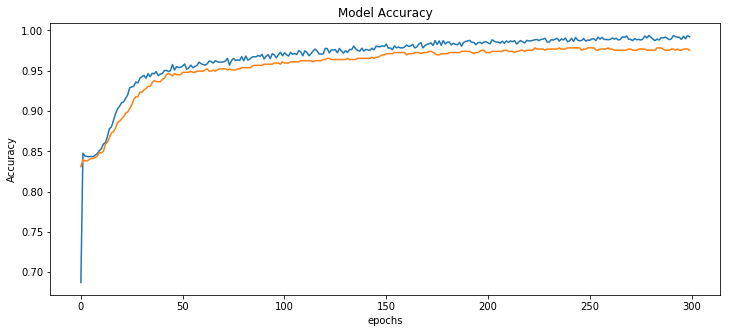

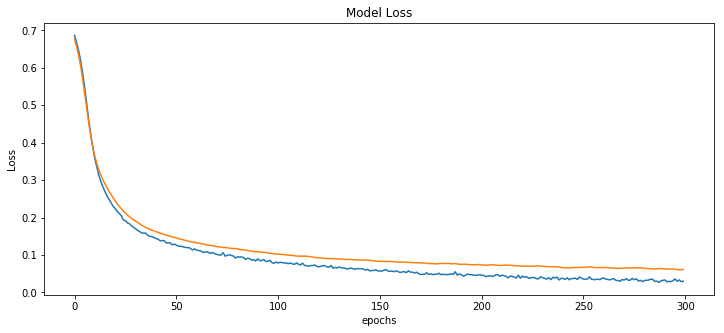

In [416]:
display()

predict = model.predict(X_test)
for row in predict:
    row[np.argmax(row)] = 1.0
    for j in row:
        if j != 1.0:
            j = 0
            
predict = np.round(predict)
predict

In [418]:
predict = np.round(predict)
predict

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [419]:
predict = np.round(predict)
df = pd.DataFrame(predict, columns=['first', 'second', 'third', 'forth'])

df['class'] = 0
df['class'][df['first'] == 1] = 'unacc'
df['class'][df['second'] == 1] = 'acc'
df['class'][df['third'] == 1] = 'good'
df['class'][df['forth'] == 1] = 'vgood'

df_out = pd.read_csv('../data/value_car/test.tsv', delimiter='\t')
df_out = pd.concat([df_out, df], axis=1)

df_out[["id","class"]].to_csv("../data/value_car/output/submission.csv",index=False, header=False)

'unacc':0, 'acc':1, 'good':2, 'vgood':3

In [420]:
df_out['class'].value_counts()

unacc    612
acc      189
good      36
vgood     27
Name: class, dtype: int64